for the sake of faster uploads, environments should be zipped up!
the original environment file was almost 0.9gb, so that would take a while to upload. Definitely can consider uploading the full thing once we're done working on a notebook.

In [13]:
import dill
dill.load_session('saved_notebook_env/neural_network.db')

In [1]:
from _Setup import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics



In [2]:
train_data = pd.read_csv(missForestTrainFile)
test_data = pd.read_csv(missForestTestFile)
val_data = pd.read_csv(validationFile)


In [3]:

x_train = train_data.drop(columns = ['Unnamed: 0','SepsisLabel'])
y_train = train_data['SepsisLabel']
test_data = test_data.drop(columns = ['Unnamed: 0'])
val = val_data.drop(columns = ['Unnamed: 0'])
x_val = val.drop(columns = ['SepsisLabel'])
y_val = val['SepsisLabel']

In [3]:
#model = tf.keras.models.load_model('nn_regularized.keras')
#model.summary()

# Old models.

In [ ]:
model = Sequential()
model.add(Dense(35, activation = "relu"))
model.add(Dense(20, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(10, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=64, epochs = 25)

Epoch 1/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.7644 - loss: 4.5084
Epoch 2/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.7941 - loss: 0.4966
Epoch 3/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8007 - loss: 0.4772
Epoch 4/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8037 - loss: 0.4676
Epoch 5/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8052 - loss: 0.4608
Epoch 6/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8056 - loss: 0.4593
Epoch 7/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.8064 - loss: 0.4567
Epoch 8/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.8067 - loss: 0.4555
Epoch 9/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8062 - loss: 0.4553
Epoch 10/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8065 - loss: 0.4539
Epoch 11/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8070 - loss: 0.45

In [19]:
#test_data = test_data.drop(columns = ['Unnamed: 0'])
predictions = model.predict(test_data)
train_predictions = model.predict(x_train)
#binary_predictions = np.where(predictions > 0.5, 1, 0)


14512/14512 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
43411/43411 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step


In [37]:
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
submission_file.to_csv('neural_submission_test.csv', index = False)
model.save('nn_regularized.keras')

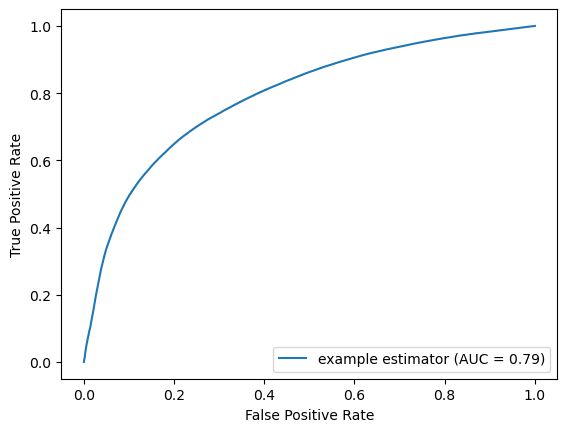

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

# These are working models, in progress.

best_performing model saved in model_outputs. 

In [36]:
model = Sequential()
model.add(tf.keras.Input(batch_size = 1028, shape = (34,)))
model.add(Dense(35, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(70, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(50, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(20, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(5, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(1, activation = "sigmoid"))

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=15)
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])


In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=1600, epochs = 100, callbacks = [callback], validation_data = (x_val, y_val))

Epoch 1/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7154 - loss: 0.5860 - val_accuracy: 0.9821 - val_loss: 11418.0869
Epoch 2/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7377 - loss: 0.5403 - val_accuracy: 0.9611 - val_loss: 26126.9980
Epoch 3/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7491 - loss: 0.5304 - val_accuracy: 0.9574 - val_loss: 21742.8047
Epoch 4/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7508 - loss: 0.5279 - val_accuracy: 0.8675 - val_loss: 20665.6113
Epoch 5/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7531 - loss: 0.5250 - val_accuracy: 0.9415 - val_loss: 21378.3652
Epoch 6/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7530 - loss: 0.5242 - val_accuracy: 0.9456 - val_loss: 22066.5664
Epoch 7/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7530 - loss: 0.5233 - val_accuracy: 0.9387 - val_loss: 15446.0732
Epoch 8/100
748/748 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step -

6819/6819 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


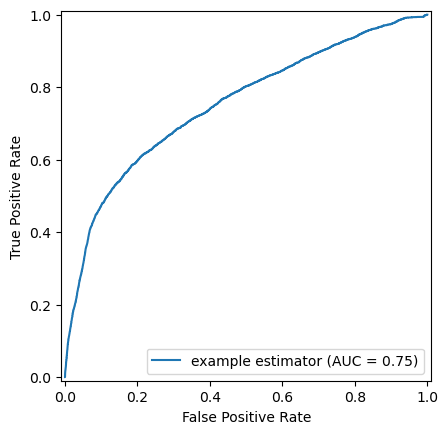

In [39]:
#predictions = model.predict(test_data_reduced)
val_predictions = model.predict(x_val)


fpr, tpr, thresholds = metrics.roc_curve(y_val, val_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()


In [40]:
thresh = np.arange(0,1,0.01)

f1_list = []
for t in thresh:
    val_binary_predictions = np.where(val_predictions > t, 1, 0)
    f1 = metrics.f1_score(y_val, val_binary_predictions )
    f1_list.append(f1)
    
dict = {"thresh":thresh, "f1":f1_list}


df_f1 = pd.DataFrame(dict)

<Axes: xlabel='thresh'>

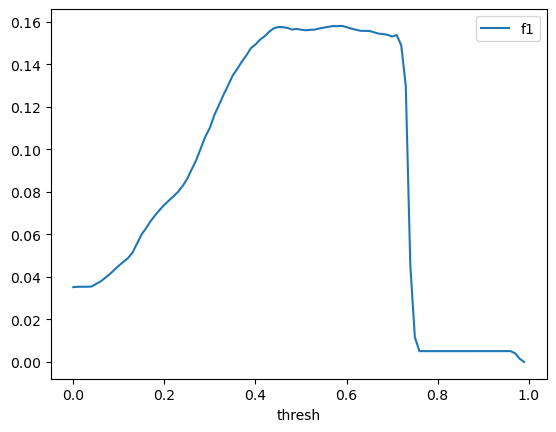

In [41]:
df_f1.plot(x = 'thresh', y = 'f1')

In [42]:
max_index = df_f1['f1'].idxmax()

df_f1.iloc[max_index]

thresh    0.590000
f1        0.158114
Name: 59, dtype: float64

In [43]:
val_binary_predictions = np.where(val_predictions > 0.59, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_val, val_binary_predictions))
f1 = metrics.f1_score(y_val, val_binary_predictions )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    214293
         1.0       0.10      0.35      0.16      3910

    accuracy                           0.93    218203
   macro avg       0.54      0.65      0.56    218203
weighted avg       0.97      0.93      0.95    218203

F1 Score (Training): 0.15811404760545694


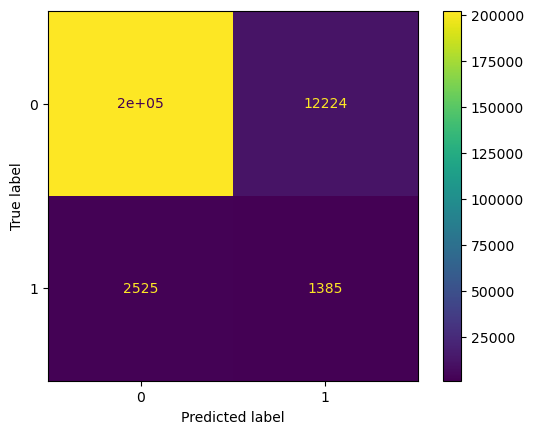

In [44]:
cm = metrics.confusion_matrix(y_val, val_binary_predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()


In [ ]:
complete_trainx = pd.concat([x_train, x_val])
complete_trainy = pd.concat([y_train, y_val])

In [46]:
model.fit(complete_trainx, complete_trainy, batch_size=1028, epochs = 200, callbacks = [callback])

Epoch 1/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7935 - loss: 0.4694
Epoch 2/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7927 - loss: 0.4687
Epoch 3/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7934 - loss: 0.4681
Epoch 4/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7930 - loss: 0.4685
Epoch 5/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7928 - loss: 0.4685
Epoch 6/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7930 - loss: 0.4680
Epoch 7/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7928 - loss: 0.4684
Epoch 8/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7939 - loss: 0.4675
Epoch 9/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7929 - loss: 0.4680
Epoch 10/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7932 - loss: 0.4684
Epoch 11/200
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7934 - loss: 0.4679
Epoc

6819/6819 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


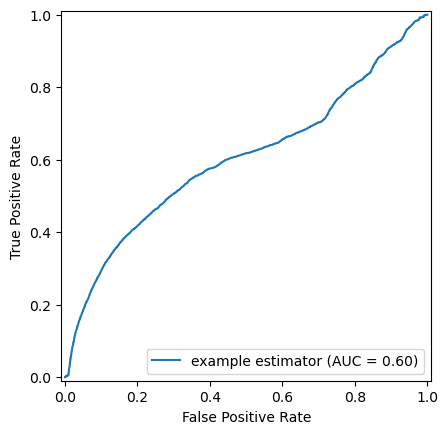

In [47]:
val_predictions = model.predict(x_val)


fpr, tpr, thresholds = metrics.roc_curve(y_val, val_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [48]:
thresh = np.arange(0,1,0.01)

f1_list = []
for t in thresh:
    val_binary_predictions = np.where(val_predictions > t, 1, 0)
    f1 = metrics.f1_score(y_val, val_binary_predictions )
    f1_list.append(f1)
    
dict = {"thresh":thresh, "f1":f1_list}


df_f1 = pd.DataFrame(dict)

<Axes: xlabel='thresh'>

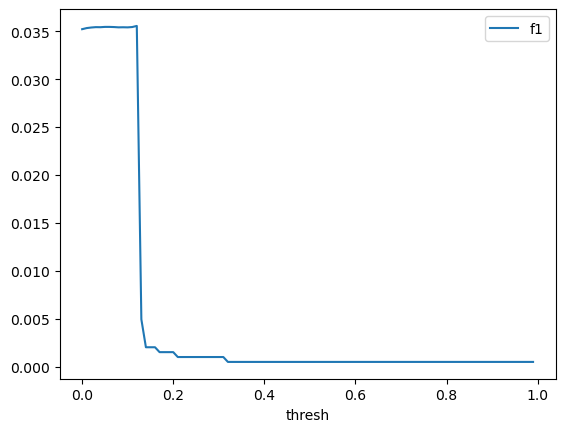

In [49]:
df_f1.plot(x = 'thresh', y = 'f1')

In [50]:
max_index = df_f1['f1'].idxmax()

df_f1.iloc[max_index]

thresh    0.120000
f1        0.035548
Name: 12, dtype: float64

In [54]:
val_binary_predictions = np.where(val_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_val, val_binary_predictions))
f1 = metrics.f1_score(y_val, val_binary_predictions )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    214293
         1.0       0.14      0.00      0.00      3910

    accuracy                           0.98    218203
   macro avg       0.56      0.50      0.50    218203
weighted avg       0.97      0.98      0.97    218203

F1 Score (Training): 0.0005105948429920858


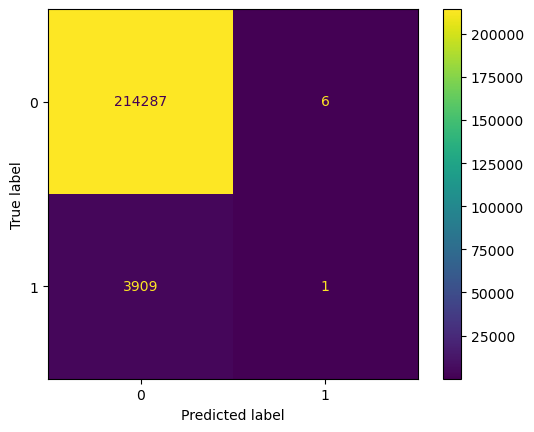

In [55]:
cm = metrics.confusion_matrix(y_val, val_binary_predictions)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()




C:\Users\super\AppData\Local\Temp\ipykernel_37552\3687365271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['Unique_ID'] = ids.groupby('patient').cumcount()+1
C:\Users\super\AppData\Local\Temp\ipykernel_37552\3687365271.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ids['ID'] = ids['patient'].astype(str) + '_' + ids['Unique_ID'].astype(str)


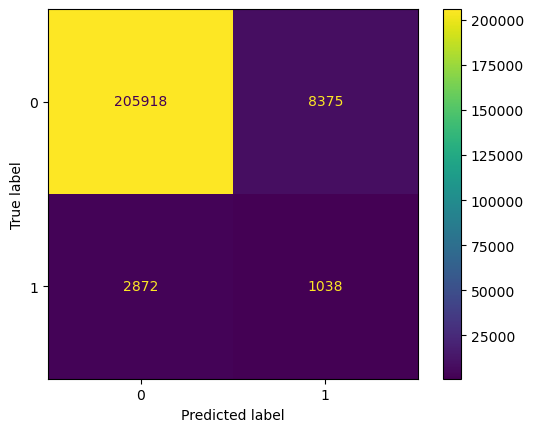

In [29]:
import itertools
from data_functions import subsequent
ids = x_val[['patient']]
ids['Unique_ID'] = ids.groupby('patient').cumcount()+1
ids['ID'] = ids['patient'].astype(str) + '_' + ids['Unique_ID'].astype(str)

ids = ids['ID']

d = {'ID': ids, "SepsisLabel" : list(itertools.chain(*val_binary_predictions))}
t = pd.DataFrame(data = d)


testing = subsequent(t)

cm = metrics.confusion_matrix(y_val, testing['SepsisLabel'])
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()



In [30]:

print("\nClassification Report (Training):\n", metrics.classification_report(y_val, testing['SepsisLabel']))
f1 = metrics.f1_score(y_val, testing['SepsisLabel'] )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97    214293
         1.0       0.11      0.27      0.16      3910

    accuracy                           0.95    218203
   macro avg       0.55      0.61      0.56    218203
weighted avg       0.97      0.95      0.96    218203

F1 Score (Training): 0.15582076108984463


In [33]:
predictions = model.predict(test_data)
binary_predictions = np.where(predictions > 0.62, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions

#submission_file = subsequent(submission_file)
submission_file.to_csv('model_outputs/neural_submission_test.csv', index = False)

14512/14512 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step


In [ ]:
model.save('model_outputs/best_performing.keras')

# Going to try RNN here

In [14]:
testing = x_train.head(50)

In [136]:
testing

,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,ICULOS,Shock,patient,Gender,Unit1,Unit2,Fever,TCP,TCA,LEU
0,-0.799514,-0.449283,0.743334,-2.128854,-0.614444,0.156049,0.427405,-1.296970,0.041034,0.067488,...,-0.810488,-0.042956,16426,1.0,0,1,1,0,0,1
1,-0.775449,-0.449283,0.743334,-2.128854,-0.614444,0.156049,0.427405,-1.296970,0.041034,0.067488,...,-0.786585,-0.042956,16426,1.0,0,1,1,0,0,1
2,-0.751383,-0.338220,0.587902,-0.930922,-0.421269,0.310043,0.723030,-1.296970,0.041034,-0.000373,...,-0.762683,-0.093116,16426,1.0,0,1,1,0,0,1
3,-0.727317,-0.393751,0.898766,-0.552628,-0.464197,0.063652,0.353499,-1.296970,-0.752669,-0.000373,...,-0.738780,-0.105082,16426,1.0,0,1,1,0,0,1
4,-0.703251,-0.726942,0.898766,-0.552628,-0.335414,-0.121140,0.057875,-1.480397,-0.752669,-0.013946,...,-0.714877,-0.428978,16426,1.0,0,1,1,0,0,1


In [ ]:
df = testing.groupby('patient').apply(lambda x: pd.Series(x.values.tolist()).rename(index=lambda x: x+1))


(1, 5)


C:\Users\super\AppData\Local\Temp\ipykernel_31600\4217746849.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = testing.groupby('patient').apply(lambda x: pd.Series(x.values.tolist()).rename(index=lambda x: x+1))


In [153]:
grouped_dfs = [group for _, group in testing.groupby('patient')]

In [160]:
len(grouped_dfs[0])

43

In [186]:
test = []
for group in grouped_dfs:
    length = len(group)
    arr = np.reshape(group, (1, length, 34))
    test.append(arr)

In [195]:
test[0]

array([[[-0.79951418, -0.44928317,  0.74333396, ...,  0.        ,
          0.        ,  1.        ],
        [-0.77544851, -0.44928317,  0.74333396, ...,  0.        ,
          0.        ,  1.        ],
        [-0.75138284, -0.33821974,  0.58790226, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.16311269, -0.39375145, -0.34468793, ...,  1.        ,
          0.        ,  1.        ],
        [ 0.18717836, -0.50481488, -0.34468793, ...,  1.        ,
          0.        ,  1.        ],
        [ 0.21124403, -0.22715631, -0.34468793, ...,  1.        ,
          0.        ,  1.        ]]])

In [178]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [122]:
df = pd.DataFrame({
    'ID': [1, 1, 2, 2],
    'Variable': ['A', 'B', 'A', 'B'],
    'Value': [10, 20, 30, 40]
})

df_pivot = df.pivot(index='ID', columns='Variable', values='Value')
print(df_pivot)

Variable   A   B
ID              
1         10  20
2         30  40


In [123]:
print(df)

   ID Variable  Value
0   1        A     10
1   1        B     20
2   2        A     30
3   2        B     40


In [ ]:
model = Sequential()
model.add(tf.keras.layers.SimpleRNN(35, activation= "tanh", ))
#model.add(tf.keras.layers.LSTM(20, return_sequences = True))
model.add(tf.keras.layers.LSTM(10, return_sequences= True))
model.add(Dense(1,activation = "sigmoid"))



In [59]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback], validation_data = (x_val, y_val))

Epoch 1/100


ValueError: Input 0 of layer "simple_rnn_8" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 34)

old code below

In [44]:
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)


Classification Report (Training):
               precision    recall  f1-score   support

         0.0       0.83      0.95      0.89   1068575
         1.0       0.68      0.36      0.47    320572

    accuracy                           0.81   1389147
   macro avg       0.76      0.66      0.68   1389147
weighted avg       0.80      0.81      0.79   1389147

F1 Score (Training): 0.47398650646234025


In [40]:
model = Sequential()
model.add(Dense(35, activation = "relu" ))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(10, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7085 - loss: 0.6010
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7741 - loss: 0.5177
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7904 - loss: 0.4749
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7946 - loss: 0.4720
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7973 - loss: 0.4687
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7963 - loss: 0.4685
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7979 - loss: 0.4663
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7980 - loss: 0.4660
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7988 - loss: 0.4645
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7988 - loss: 0.4648
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7977 - loss: 0.4650
Epoch 12/100
1352/1

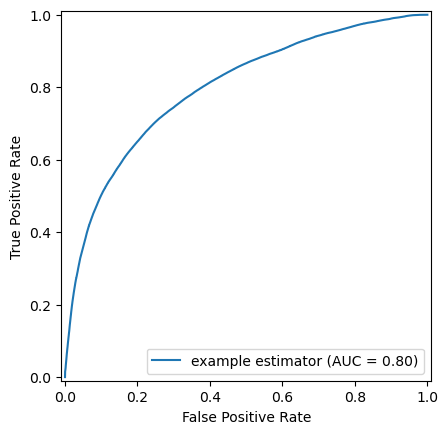

In [42]:
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)

In [66]:
predictions = model.predict(test_data)
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
#submission_file.to_csv('neural_submission_test.csv', index = False)

14512/14512 ━━━━━━━━━━━━━━━━━━━━ 12s 844us/step


# Trying out different dropout rates

In [61]:
submission_file

,ID,SepsisLabel
0,6560_1,0
1,6560_2,0
2,6560_3,0
3,6560_4,0
4,6560_5,0
...,...,...
464349,5630_16,0
464350,5630_17,0
464351,5630_18,0
464352,5630_19,0


In [ ]:
submission_file[['patient_id', 'time']] = submission_file['ID'].str.split('_', expand=True)
submission_file['time'] = submission_file['time'].astype(int)


# Apply the rule: if there's a 1 at any time point, set all later values to 1 for that patient
submission_file['SepsisLabel'] = submission_file.groupby('patient_id')['SepsisLabel'].transform(lambda x: x.cumsum().clip(upper=1))

# Combine patient ID and time back into a single column if needed
submission_file['patient_time'] = submission_file['patient_id'] + '_' + submission_file['time'].astype(str)
submission_file = submission_file[['ID','SepsisLabel']]


In [68]:
submission_file.iloc[6381:6391]

,ID,SepsisLabel
6381,697_43,0
6382,697_44,0
6383,697_45,0
6384,697_46,1
6385,697_47,1
6386,697_48,1
6387,697_49,1
6388,697_50,1
6389,697_51,1
6390,9747_1,0


In [22]:
def create_model(dropout):
    model = Sequential()
    model.add(Dense(30, activation = "relu" ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(25, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(20, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(4, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6821 - loss: 0.6303
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7814 - loss: 0.4977
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7952 - loss: 0.4712
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7952 - loss: 0.4705
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7972 - loss: 0.4664
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7974 - loss: 0.4656
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7969 - loss: 0.4659
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7976 - loss: 0.4644
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7969 - loss: 0.4652
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7965 - loss: 0.4653
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7979 - loss: 0.4635
Epoch 12/100
1352/

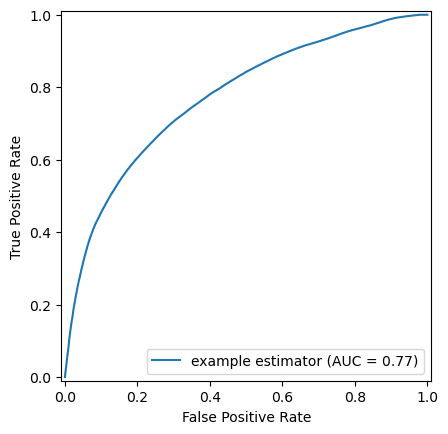

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)

model = create_model(0.1)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)



In [35]:
model.save('model_outputs/nn_dropout_01.keras')

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6827 - loss: 0.6216
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7688 - loss: 0.5458
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7715 - loss: 0.5338
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7887 - loss: 0.4836
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7896 - loss: 0.4801
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7903 - loss: 0.4788
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7915 - loss: 0.4770
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7905 - loss: 0.4778
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7921 - loss: 0.4751
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7921 - loss: 0.4752
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7923 - loss: 0.4753
Epoch 12/100
1352/1

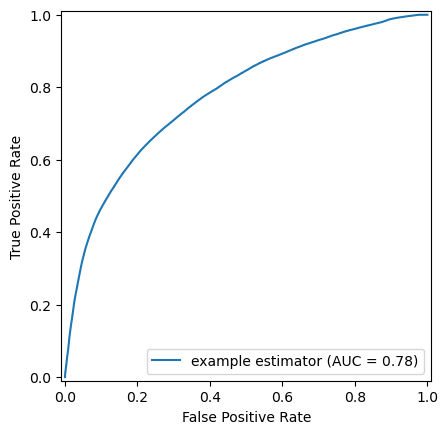

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)

model = create_model(0.2)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)


In [53]:
model.save('model_outputs/nn_dropout_02.keras')

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6884 - loss: 0.6064
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7963 - loss: 0.4921
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7976 - loss: 0.4746
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7990 - loss: 0.4678
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8010 - loss: 0.4644
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8027 - loss: 0.4622
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8027 - loss: 0.4592
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8029 - loss: 0.4589
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8028 - loss: 0.4565
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8025 - loss: 0.4562
43411/43411 ━━━━━━━━━━━━━━━━━━━━ 41s 934us/step

Classification Report (Training):
               precision  

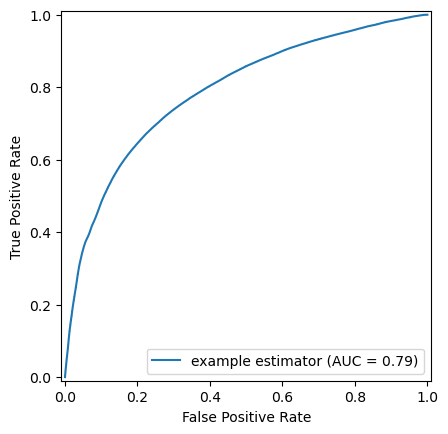

In [54]:
model = create_model(0.3)
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])
train_predictions = model.predict(x_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
train_binary_predictions = np.where(train_predictions > 0.5, 1, 0)
print("\nClassification Report (Training):\n", metrics.classification_report(y_train, train_binary_predictions))
f1 = metrics.f1_score(y_train, train_binary_predictions )
print("F1 Score (Training):", f1)

In [55]:
model.save('model_outputs/nn_dropout_03.keras')

Looks like dropout rate of 0.1 seems to do best? Let's look at other hyperparameters.

In [ ]:
def create_model_():
    model = Sequential()
    model.add(Dense(30, activation = "relu", ))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(25, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(20, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(4, activation = "relu"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [2]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


This one will target batch size and epochs.

In [23]:
def create_model():
	model = Sequential()
	model.add(Dense(30, activation = "relu"))
	model.add(Dense(20, activation = "relu"))
	model.add(Dense(10, activation = "relu"))
	model.add(Dense(4, activation = "relu"))
	model.add(Dense(1, activation = "sigmoid"))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [26]:
seed = 5
tf.random.set_seed(seed)
model= KerasClassifier(model = create_model, n_outputs_expected_ = 1, verbose = 0)

batch_size = [10,20,40,60,80,100]
epochs = [25,50,75]

param_grid = dict(batch_size= batch_size, epochs=epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs= -1, cv=5)
grid_result= grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_12' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_13' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_14' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_15' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_16' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_17' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_18' has no defined outputs yet.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_19' has no defined outputs yet.


In [14]:
dill.dump_session('saved_notebook_env/neural_network.db')